<a href="https://colab.research.google.com/github/SunbalAzizLCWU/BSSE-DS-Project/blob/main/SunbalW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =======================================================================
#
#               Data Science - AI: Week 8 Complete Code
#               Student: Sunbal Aziz (2225165139)
#
# =======================================================================

# -----------------------------------------------------------------------
# Part 1: Dataset Setup (Required for every new session)
# -----------------------------------------------------------------------
print("--- Part 1: Setting up Kaggle and Downloading Dataset ---")

# 1. Install Kaggle library
!pip install kaggle

# 2. Set up the Kaggle API token
# (Ensure kaggle.json is uploaded to your Colab environment)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token installed.")

# 3. Download the dataset
!kaggle datasets download -d asdasdasasdas/garbage-classification
print("\nDataset downloaded. Unzipping...")

# 4. Remove old directory to ensure a clean unzip
!rm -rf "Garbage classification"
print("Removed old directories.")

# 5. Unzip the file
!unzip -q garbage-classification.zip
print("Dataset unzipped. Ready for preprocessing.")

--- Part 1: Setting up Kaggle and Downloading Dataset ---
Kaggle API token installed.
Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
  0% 0.00/82.0M [00:00<?, ?B/s]
100% 82.0M/82.0M [00:00<00:00, 1.06GB/s]

Dataset downloaded. Unzipping...
Removed old directories.
Dataset unzipped. Ready for preprocessing.


In [2]:
# Part 2: Imports and Data Preprocessing
# -----------------------------------------------------------------------
print("\n--- Part 2: Importing Libraries and Preprocessing Data ---")

# Import necessary libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# --- Import Preprocessing & Model ---
from sklearn.preprocessing import StandardScaler

# --- Import Week 8 Models ---
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- Preprocessing (Identical to previous weeks) ---

# Define constants
# This is the correct path
data_dir = 'Garbage classification/Garbage classification'
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
IMG_SIZE = 64

# Lists to hold our data
X_data = [] # This will hold the flattened image data
y_data = [] # This will hold the labels

def preprocess_images():
    """
    Loops through all images, resizes them, flattens them,
    and returns two numpy arrays: X (data) and y (labels).
    """
    print(f"\nStarting image preprocessing from {data_dir}...")
    for class_name in classes:
        class_dir_path = os.path.join(data_dir, class_name)
        class_label = classes.index(class_name)

        if not os.path.isdir(class_dir_path):
            print(f"Warning: Directory not found {class_dir_path}")
            continue

        for image_file in os.listdir(class_dir_path):
            image_path = os.path.join(class_dir_path, image_file)
            try:
                img = Image.open(image_path).convert('L') # 'L' = grayscale
                img_resized = img.resize((IMG_SIZE, IMG_SIZE))
                img_vector = np.array(img_resized).flatten()
                X_data.append(img_vector)
                y_data.append(class_label)
            except Exception as e:
                print(f"Skipping corrupted file: {image_path} | Error: {e}")

    print("Image preprocessing complete.")
    return np.array(X_data), np.array(y_data)

# Run the function
X, y = preprocess_images()

print(f"\nData shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

# Scale the data
print("\nScaling data (StandardScaler)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaling complete.")


--- Part 2: Importing Libraries and Preprocessing Data ---

Starting image preprocessing from Garbage classification/Garbage classification...
Image preprocessing complete.

Data shape (X): (2527, 4096)
Labels shape (y): (2527,)

Scaling data (StandardScaler)...
Data scaling complete.


In [3]:
# -----------------------------------------------------------------------
# Part 3: Week 8 Class Task & Assignment (K-Means & PCA)
# -----------------------------------------------------------------------
print("\n--- Part 3: Running Unsupervised Learning Models ---")

# --- 3.1: K-Means Clustering ---
# We tell it to find 6 clusters, since we know there are 6 classes
print("Running K-Means clustering (n_clusters=6)...")
model_kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
model_kmeans.fit(X_scaled)
# Get the labels the model assigned (e.g., Cluster 0, Cluster 1, etc.)
kmeans_labels = model_kmeans.labels_
print("K-Means clustering complete.")

# --- 3.2: PCA (Dimensionality Reduction) ---
# We reduce 4,096 features down to just 2
print("Running PCA (n_components=2)...")
model_pca = PCA(n_components=2, random_state=42)
X_pca = model_pca.fit_transform(X_scaled)
print("PCA complete. Data reduced to 2 dimensions.")
print(f"New PCA data shape: {X_pca.shape}")

# --- 3.3: Combine results for plotting ---
# Let's put everything into one DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
df_pca['kmeans_cluster'] = kmeans_labels
df_pca['true_label'] = y
df_pca['true_class_name'] = df_pca['true_label'].map(lambda i: classes[i])




--- Part 3: Running Unsupervised Learning Models ---
Running K-Means clustering (n_clusters=6)...
K-Means clustering complete.
Running PCA (n_components=2)...
PCA complete. Data reduced to 2 dimensions.
New PCA data shape: (2527, 2)



  Week 8 Assignment: Clustering & PCA Visualization
Generating plots...


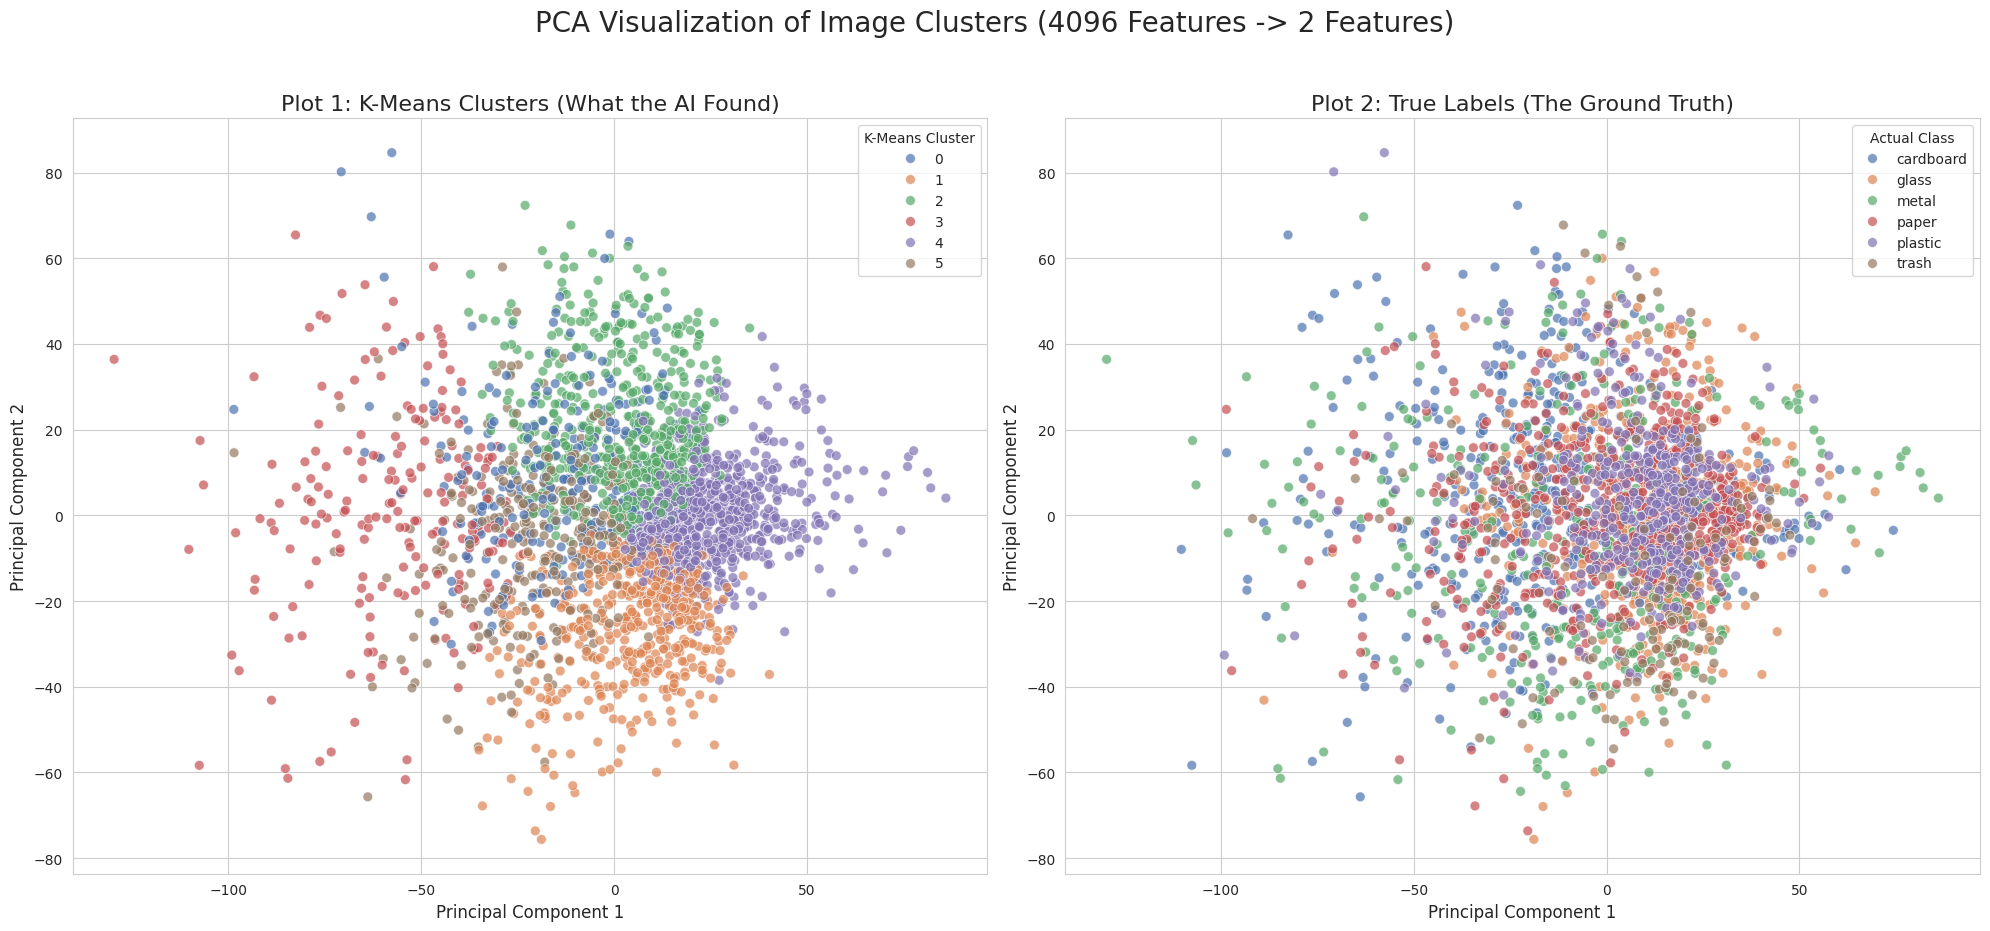


--- Week 8 Tasks Complete ---


In [4]:
# -----------------------------------------------------------------------
# Part 4: Week 8 Visualization (Assignment)
# -----------------------------------------------------------------------
print("\n=======================================================")
print("  Week 8 Assignment: Clustering & PCA Visualization")
print("=======================================================")

print("Generating plots...")

plt.figure(figsize=(20, 9))
sns.set_style("whitegrid")

# --- Plot 1: Clusters found by K-Means ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_pca,
    x='PCA 1',
    y='PCA 2',
    hue='kmeans_cluster',
    palette='deep',
    s=50,
    alpha=0.7
)
plt.title('Plot 1: K-Means Clusters (What the AI Found)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='K-Means Cluster')

# --- Plot 2: True, Actual Labels ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_pca,
    x='PCA 1',
    y='PCA 2',
    hue='true_class_name', # Color by the *real* class names
    palette='deep',
    s=50,
    alpha=0.7
)
plt.title('Plot 2: True Labels (The Ground Truth)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Actual Class')

plt.suptitle('PCA Visualization of Image Clusters (4096 Features -> 2 Features)', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

print("\n--- Week 8 Tasks Complete ---")